In [1]:
import pickle

MAX_ERROR = 500

predictions_svr = pickle.load(open('validation_set_predictions_svr.pickle', 'rb'))
predictions_rf = pickle.load(open('validation_set_predictions_rf.pickle', 'rb'))
predictions_svr.shape, predictions_rf.shape

((516, 2), (516, 2))

In [2]:
import numpy as np

def convert_to_conc(column):
    return column.apply(lambda x : np.power(10, -1 * x) * 1.0e9)

predictions_svr['ic50_predicted_nM'] = convert_to_conc(predictions_svr.ic50_predicted)
predictions_svr['ic50_true_nM']= convert_to_conc(predictions_svr.ic50_true)
predictions_rf['ic50_predicted_nM'] = convert_to_conc(predictions_rf.ic50_predicted)
predictions_rf['ic50_true_nM']= convert_to_conc(predictions_rf.ic50_true)

In [3]:
print(predictions_rf.shape)
predictions_rf.index = predictions_svr.index
predictions_rf.head()

(516, 4)


,ic50_predicted,ic50_true,ic50_predicted_nM,ic50_true_nM
smiles,,,,
CCc1c(O)ccc2c1O[C@H](c1ccc(OCCN3CCCCC3)cc1)[C@H](c1ccc(O)cc1)S2,7.985939,8.327902,10.329077,4.70
COc1c(Br)c(O)c(Br)c2nc(-c3ccc(O)c(F)c3)oc12,5.588936,6.252588,2576.702591,559.00
Oc1ccc2nc(-c3ccc(O)c(F)c3)cc(Cl)c2c1,6.522049,6.609065,300.573763,246.00
COc1cc(/C=C2\SC(=O)NC2=O)ccc1Oc1ccc(C#N)cc1C(F)(F)F,5.246315,5.657577,5671.329663,2200.00
CCOC(=O)CSc1nn(C)c(=S)s1,4.752796,5.097820,17668.690016,7983.25


In [4]:
print(predictions_svr.shape)
predictions_svr.head()

(516, 4)


,ic50_predicted,ic50_true,ic50_predicted_nM,ic50_true_nM
smiles,,,,
CCc1c(O)ccc2c1O[C@H](c1ccc(OCCN3CCCCC3)cc1)[C@H](c1ccc(O)cc1)S2,7.867606,8.327902,13.564205,4.70
COc1c(Br)c(O)c(Br)c2nc(-c3ccc(O)c(F)c3)oc12,5.748524,6.252588,1784.331355,559.00
Oc1ccc2nc(-c3ccc(O)c(F)c3)cc(Cl)c2c1,6.004725,6.609065,989.178529,246.00
COc1cc(/C=C2\SC(=O)NC2=O)ccc1Oc1ccc(C#N)cc1C(F)(F)F,5.301276,5.657577,4997.164427,2200.00
CCOC(=O)CSc1nn(C)c(=S)s1,5.018956,5.097820,9572.899722,7983.25


In [5]:
threshold = MAX_ERROR

diffs_rf = ((predictions_rf.ic50_predicted_nM - predictions_rf.ic50_true_nM).abs() < threshold).tolist()
accurate_rf = predictions_rf[diffs_rf]

diffs_svr = ((predictions_svr.ic50_predicted_nM - predictions_svr.ic50_true_nM).abs() < threshold).tolist()
accurate_svr = predictions_svr[diffs_svr]

print(accurate_rf.shape, accurate_svr.shape)

(263, 4) (253, 4)


In [6]:
from pandas import merge

accurate_all = merge(accurate_rf, accurate_svr, suffixes=('_rf', '_svr'), left_index=True, right_index=True, how='inner')
print(accurate_all.shape)
accurate_all.head()

(226, 8)


,ic50_predicted_rf,ic50_true_rf,ic50_predicted_nM_rf,ic50_true_nM_rf,ic50_predicted_svr,ic50_true_svr,ic50_predicted_nM_svr,ic50_true_nM_svr
smiles,,,,,,,,
CCc1c(O)ccc2c1O[C@H](c1ccc(OCCN3CCCCC3)cc1)[C@H](c1ccc(O)cc1)S2,7.985939,8.327902,10.329077,4.7,7.867606,8.327902,13.564205,4.7
Cc1nc(CN2CCN(c3nc(NCCc4ccc(O)cc4)nc(N(C)CCCc4ccc(Cl)cc4)n3)CC2)cs1,7.144063,6.823909,71.769055,150.0,6.885006,6.823909,130.314751,150.0
Oc1ccc([C@H]2Sc3cc(O)ccc3S[C@H]2c2ccc(OCCN3CCCC3)c(Br)c2)cc1,8.621171,8.397940,2.392371,4.0,8.679498,8.397940,2.091714,4.0
O=C1c2c(Cl)cc(O)cc2O[C@H](c2ccc(OCCN3CCCCC3)cc2)[C@@H]1c1ccc(O)cc1,7.499370,7.236572,31.668707,58.0,7.472004,7.236572,33.728433,58.0
C=CCc1cc(O)cc2nc(-c3ccc(O)cc3)oc12,6.162645,6.138466,687.630518,727.0,5.979697,6.138466,1047.858442,727.0


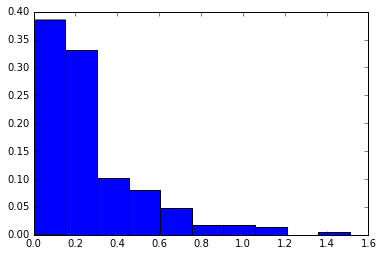

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

differences = []
for x, y in zip(accurate_all.ic50_predicted_rf, accurate_all.ic50_predicted_svr):
    differences.append(abs(x - y))
differences = np.array(differences)
weights = np.ones_like(differences) / len(differences)
plt.hist(differences, weights=weights)
plt.show()

(0.94612834556477421, 7.0286044686621165e-254)


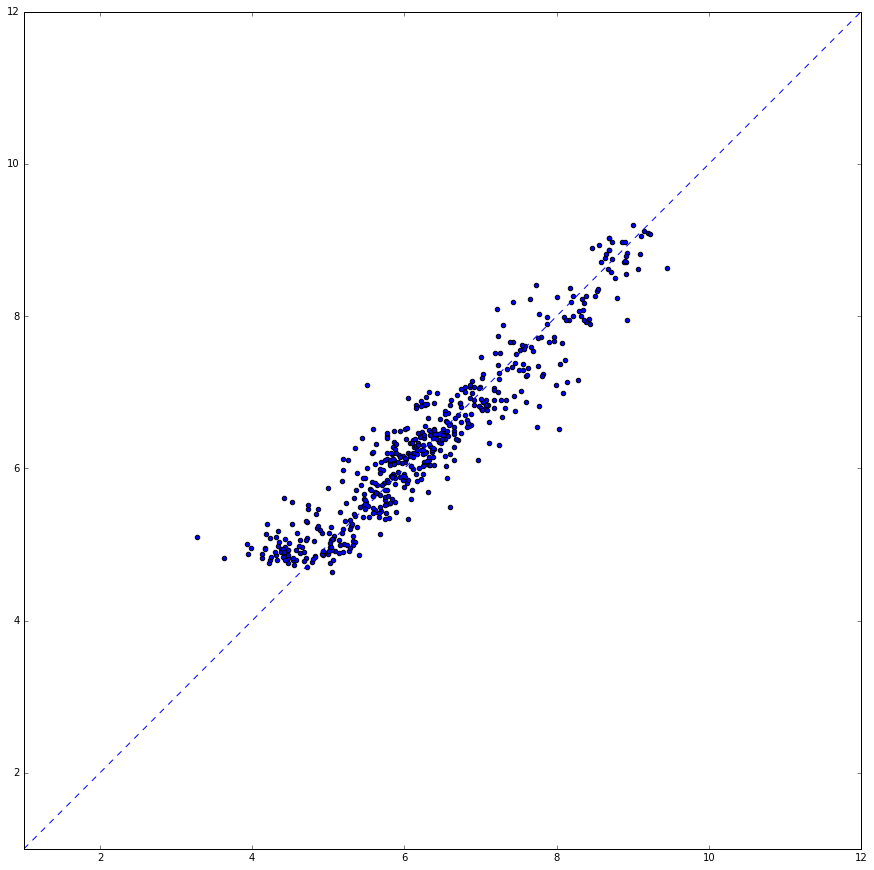

In [8]:
from scipy.stats import pearsonr

plt.rcParams["figure.figsize"] = [15, 15]
span = (1,12)
axes = plt.gca()
axes.set_xlim(span)
axes.set_ylim(span)

print(pearsonr(predictions_svr.ic50_predicted, predictions_rf.ic50_predicted))

plt.plot((span[0],span[1]), (span[0],span[1]), linestyle='--')
plt.scatter(
    predictions_svr.ic50_predicted
    , predictions_rf.ic50_predicted
    , c='blue'
    , s=20
)